# Speaker diarization

A function to do speaker diarization (who speaks when) on a directory of audio files

In this notebook we will go over the function's docs and outputs and see an end-to-end example of running it.

1. [Documentation](#chapter1)
2. [End-to-end Demo](#chapter2)

<a id="chapter1"></a>
## 1. Documentation

The function receive a directory path with all the audio files in it. It walk through the directory, get all the audio file. Then it does the speaker diarization on these audio files to detect who speaks when. 

### 1.1. Parameters:
* **context**: `mlrun.MLClientCtx`
    
    The MLRun context
    
* **input_path**: `str`
 
    The input directory with all the audio files (now we support mp3, flv, mp4, wma, wav formats)
     
* **output_directory**: `str`
 
    The directory that is used to store the result of the nemo diarization pipeline. 
     
* **condition_show_plot**: `bool`
    If set to true, the diarization results will be plotted in the notebook
    
* **num_speakers**: `int`
    Number of sepakers in the audio file
    
* **vad_model**: `str`
    Name of the VAD model to use
    
* **speaker_embeddings_model**: `str`
    Name of the speaker embeddings model to use
    
* **msdd_model**: `str`
    Name of the msdd model to use
    
* **msdd_model**: `str`
    Name of the msdd model to use
    
* **device**: `str`
    Device to use for diarization (default cuda if cuda available, else cpu)
    
* **kwargs**: `dict`
    Additional arguments to pass to the diarizer following the format <config_name>__<parameter_name>__<attribute_name>.
    The diarization pipeline has 5 configs: GeneralConfig, VADConfig, SpeakerEmbeddingConfig, ClusteringConfig, MSDDConfig. For different config we have different parameters to pass. Please refer to Nemo's [documentation](https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/stable/asr/speaker_diarization/intro.html#) for details. Please note the default configurations in this function is suitable for telephone recordings involving 2~8 speakers in a session and may not show the best performance on the other types of acoustic conditions or dialogues.

### 1.2. Outputs:

There are two outputs of this function. Please note for each audio file, we will log a dataframe of the speaker segments.

* **output_path**: `str`
    
    The directory stored all the Nemo results 
    
* **errors** : `dict`
    A dict of errors when processing the audio files if any

<a id="chapter2"></a>
## 2. Demo

In [6]:
! pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 63.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 75.6 MB/s eta 0:00:00:00:0100:01
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=eaf28fe352eb316d17c69d52f73930f922695fcb54a2069f4dddeeb93c4ad7af
  Stored in directory: /igz/.cache/pip/wheels/5a/d9/18/59ee81e4098fc14408ea3d13ae1c472d8380acb97160d2619a
  Created wheel for ffprobe: filename=ffprobe-0.5-py3-none-any.whl size=3406 sha256=c4c0c0a958f6b44633554381ddedcf95cfa

### 2.1 Importing the speaker_diarization function from hub

To import the function directly from hub, use:

speaker_diarization = mlrun.import_function("hub://speaker_diarization")

### 2.2 Run the function

In [1]:
import tempfile
import mlrun
artifact_path = tempfile.mktemp()
speaker_diarization_func = mlrun.import_function("function.yaml")

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


> 2023-10-10 19:58:08,016 [info] Storing function: {'name': 'speaker-diarization-diarize', 'uid': '997588b177424896bc6f7d0ed0c78021', 'db': None}


Diarizing:   0%|          | 0/2 [00:00<?, ?file/s]

[NeMo W 2023-10-10 19:58:33 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/ami_train_0.63.json,/manifests/freesound_background_train.json,/manifests/freesound_laughter_train.json,/manifests/fisher_2004_background.json,/manifests/fisher_2004_speech_sampled.json,/manifests/google_train_manifest.json,/manifests/icsi_all_0.63.json,/manifests/musan_freesound_train.json,/manifests/musan_music_train.json,/manifests/musan_soundbible_train.json,/manifests/mandarin_train_sample.json,/manifests/german_train_sample.json,/manifests/spanish_train_sample.json,/manifests/french_train_sample.json,/manifests/russian_train_sample.json
    sample_rate: 16000
    labels:
    - background
    - speech
    batch_size: 256
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: sca

[NeMo I 2023-10-10 19:58:33 features:289] PADDING: 16
[NeMo I 2023-10-10 19:58:34 save_restore_connector:249] Model EncDecClassificationModel was successfully restored from /User/functions/speaker_diarization/model/vad_multilingual_marblenet.nemo.
[NeMo I 2023-10-10 19:58:34 clustering_diarizer:120] VAD model loaded locally from ./model/vad_multilingual_marblenet.nemo


[NeMo W 2023-10-10 19:58:35 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: data/tr/train.json
    sample_rate: 16000
    labels:
    - 0000342a30c4be7320c9a54768ffe89b2082f7c13a65ef3bb6f9067aa300005ca828f9d132ac59bfd75f01e66906457ac87fd9a5d9fadeeab58902e9b451aaa3
    - 004136c09d6aa63552057076c0282543c65714b7a632fb859aa47a44b9bdb1c7e5d31ff936cb7ded0292c553a35dfea5ab1d3ce4e595edc5c798ad732ebc6a35
    - 0042924c9d0d1c87001e1720a1dbb8ef3954e4e3ca0fab2adba81d37f5d213f1a81ac8f8bbe95078b065cffd7c295453842629dcd9b742341874ffcce2f2484c
    - 004f49659158fe525615de42506844f01cf5584de02b45e2b80870ffa034b30eb0932d789a364e0db98774912feb51c969650fd9003af597b4763bbe5afe8f54
    - 0079fb1f5032072401fa76c75ab307f05b4a9a12190a23fb7db1288627a523a272f8638245559b6b7d8217fb7c799d0f7209d5119e1b7018bf4bf8f549fa5cdd
    - 0080c4dd1464

[NeMo I 2023-10-10 19:58:35 features:289] PADDING: 16
[NeMo I 2023-10-10 19:58:36 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /User/functions/speaker_diarization/model/titanet_finetune_tr.nemo.
[NeMo I 2023-10-10 19:58:36 clustering_diarizer:145] Speaker Model restored locally from ./model/titanet_finetune_tr.nemo


[NeMo W 2023-10-10 19:58:36 clustering_diarizer:411] Deleting previous clustering diarizer outputs.


[NeMo I 2023-10-10 19:58:36 speaker_utils:93] Number of files to diarize: 1
[NeMo I 2023-10-10 19:58:36 clustering_diarizer:309] Split long audio file to avoid CUDA memory issue



splitting manifest: 100%|██████████| 1/1 [00:21<00:00, 21.19s/it]

[NeMo I 2023-10-10 19:58:57 vad_utils:107] The prepared manifest file exists. Overwriting!
[NeMo I 2023-10-10 19:58:57 classification_models:273] Perform streaming frame-level VAD
[NeMo I 2023-10-10 19:58:57 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:58:57 collections:302] Dataset loaded with 3 items, total duration of  0.04 hours.
[NeMo I 2023-10-10 19:58:57 collections:304] # 3 files loaded accounting to # 1 labels




vad:   0%|          | 0/3 [00:00<?, ?it/s][NeMo W 2023-10-10 19:58:57 nemo_logging:349] User provided device_type of 'cuda', but CUDA is not available. Disabling
    

vad: 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

[NeMo I 2023-10-10 19:59:00 clustering_diarizer:250] Generating predictions with overlapping input segments




generating preds: 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]
                                                               

[NeMo I 2023-10-10 19:59:01 clustering_diarizer:262] Converting frame level prediction to speech/no-speech segment in start and end times format.



creating speech segments: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

[NeMo I 2023-10-10 19:59:01 clustering_diarizer:287] Subsegmentation for embedding extraction: scale0, output/tr/real_state/speaker_outputs/subsegments_scale0.json
[NeMo I 2023-10-10 19:59:01 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:01 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:01 collections:302] Dataset loaded with 178 items, total duration of  0.07 hours.
[NeMo I 2023-10-10 19:59:01 collections:304] # 178 files loaded accounting to # 1 labels




[1/5] extract embeddings: 100%|██████████| 3/3 [00:05<00:00,  1.80s/it]

[NeMo I 2023-10-10 19:59:07 clustering_diarizer:389] Saved embedding files to output/tr/real_state/speaker_outputs/embeddings


[NeMo I 2023-10-10 19:59:07 clustering_diarizer:287] Subsegmentation for embedding extraction: scale1, output/tr/real_state/speaker_outputs/subsegments_scale1.json
[NeMo I 2023-10-10 19:59:07 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:07 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:07 collections:302] Dataset loaded with 215 items, total duration of  0.07 hours.
[NeMo I 2023-10-10 19:59:07 collections:304] # 215 files loaded accounting to # 1 labels



[2/5] extract embeddings: 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]

[NeMo I 2023-10-10 19:59:12 clustering_diarizer:389] Saved embedding files to output/tr/real_state/speaker_outputs/embeddings


[NeMo I 2023-10-10 19:59:12 clustering_diarizer:287] Subsegmentation for embedding extraction: scale2, output/tr/real_state/speaker_outputs/subsegments_scale2.json
[NeMo I 2023-10-10 19:59:12 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:12 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:12 collections:302] Dataset loaded with 270 items, total duration of  0.07 hours.
[NeMo I 2023-10-10 19:59:12 collections:304] # 270 files loaded accounting to # 1 labels



[3/5] extract embeddings: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]

[NeMo I 2023-10-10 19:59:18 clustering_diarizer:389] Saved embedding files to output/tr/real_state/speaker_outputs/embeddings


[NeMo I 2023-10-10 19:59:18 clustering_diarizer:287] Subsegmentation for embedding extraction: scale3, output/tr/real_state/speaker_outputs/subsegments_scale3.json
[NeMo I 2023-10-10 19:59:18 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:18 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:18 collections:302] Dataset loaded with 363 items, total duration of  0.08 hours.
[NeMo I 2023-10-10 19:59:18 collections:304] # 363 files loaded accounting to # 1 labels



[4/5] extract embeddings: 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

[NeMo I 2023-10-10 19:59:24 clustering_diarizer:389] Saved embedding files to output/tr/real_state/speaker_outputs/embeddings
[NeMo I 2023-10-10 19:59:24 clustering_diarizer:287] Subsegmentation for embedding extraction: scale4, output/tr/real_state/speaker_outputs/subsegments_scale4.json
[NeMo I 2023-10-10 19:59:24 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:24 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:24 collections:302] Dataset loaded with 547 items, total duration of  0.08 hours.
[NeMo I 2023-10-10 19:59:24 collections:304] # 547 files loaded accounting to # 1 labels




[5/5] extract embeddings: 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

[NeMo I 2023-10-10 19:59:30 clustering_diarizer:389] Saved embedding files to output/tr/real_state/speaker_outputs/embeddings



[NeMo W 2023-10-10 19:59:30 speaker_utils:464] cuda=False, using CPU for eigen decomposition. This might slow down the clustering process.

clustering: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

[NeMo I 2023-10-10 19:59:31 clustering_diarizer:464] Outputs are saved in /User/functions/speaker_diarization/output/tr/real_state directory



[NeMo W 2023-10-10 19:59:31 der:185] Check if each ground truth RTTMs were present in the provided manifest file. Skipping calculation of Diariazation Error Rate
[NeMo W 2023-10-10 19:59:33 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/ami_train_0.63.json,/manifests/freesound_background_train.json,/manifests/freesound_laughter_train.json,/manifests/fisher_2004_background.json,/manifests/fisher_2004_speech_sampled.json,/manifests/google_train_manifest.json,/manifests/icsi_all_0.63.json,/manifests/musan_freesound_train.json,/manifests/musan_music_train.json,/manifests/musan_soundbible_train.json,/manifests/mandarin_train_sample.json,/manifests/german_train_sample.json,/manifests/spanish_train_sample.json,/manifests/french_train_sample.json,/manifests/russian_train_sample.json
    sample_rate: 16000
 

[NeMo I 2023-10-10 19:59:33 features:289] PADDING: 16
[NeMo I 2023-10-10 19:59:33 save_restore_connector:249] Model EncDecClassificationModel was successfully restored from /User/functions/speaker_diarization/model/vad_multilingual_marblenet.nemo.
[NeMo I 2023-10-10 19:59:33 clustering_diarizer:120] VAD model loaded locally from ./model/vad_multilingual_marblenet.nemo


[NeMo W 2023-10-10 19:59:34 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: data/tr/train.json
    sample_rate: 16000
    labels:
    - 0000342a30c4be7320c9a54768ffe89b2082f7c13a65ef3bb6f9067aa300005ca828f9d132ac59bfd75f01e66906457ac87fd9a5d9fadeeab58902e9b451aaa3
    - 004136c09d6aa63552057076c0282543c65714b7a632fb859aa47a44b9bdb1c7e5d31ff936cb7ded0292c553a35dfea5ab1d3ce4e595edc5c798ad732ebc6a35
    - 0042924c9d0d1c87001e1720a1dbb8ef3954e4e3ca0fab2adba81d37f5d213f1a81ac8f8bbe95078b065cffd7c295453842629dcd9b742341874ffcce2f2484c
    - 004f49659158fe525615de42506844f01cf5584de02b45e2b80870ffa034b30eb0932d789a364e0db98774912feb51c969650fd9003af597b4763bbe5afe8f54
    - 0079fb1f5032072401fa76c75ab307f05b4a9a12190a23fb7db1288627a523a272f8638245559b6b7d8217fb7c799d0f7209d5119e1b7018bf4bf8f549fa5cdd
    - 0080c4dd1464

[NeMo I 2023-10-10 19:59:34 features:289] PADDING: 16
[NeMo I 2023-10-10 19:59:35 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /User/functions/speaker_diarization/model/titanet_finetune_tr.nemo.
[NeMo I 2023-10-10 19:59:35 clustering_diarizer:145] Speaker Model restored locally from ./model/titanet_finetune_tr.nemo


[NeMo W 2023-10-10 19:59:35 clustering_diarizer:411] Deleting previous clustering diarizer outputs.


[NeMo I 2023-10-10 19:59:35 speaker_utils:93] Number of files to diarize: 1
[NeMo I 2023-10-10 19:59:35 clustering_diarizer:309] Split long audio file to avoid CUDA memory issue



splitting manifest: 100%|██████████| 1/1 [00:00<00:00, 150.20it/s]

[NeMo I 2023-10-10 19:59:35 vad_utils:107] The prepared manifest file exists. Overwriting!
[NeMo I 2023-10-10 19:59:35 classification_models:273] Perform streaming frame-level VAD
[NeMo I 2023-10-10 19:59:35 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:35 collections:302] Dataset loaded with 3 items, total duration of  0.03 hours.
[NeMo I 2023-10-10 19:59:35 collections:304] # 3 files loaded accounting to # 1 labels




vad:   0%|          | 0/3 [00:00<?, ?it/s][NeMo W 2023-10-10 19:59:35 nemo_logging:349] User provided device_type of 'cuda', but CUDA is not available. Disabling
    

vad: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

[NeMo I 2023-10-10 19:59:38 clustering_diarizer:250] Generating predictions with overlapping input segments




generating preds: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
                                                               

[NeMo I 2023-10-10 19:59:39 clustering_diarizer:262] Converting frame level prediction to speech/no-speech segment in start and end times format.



creating speech segments: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

[NeMo I 2023-10-10 19:59:40 clustering_diarizer:287] Subsegmentation for embedding extraction: scale0, output/tr/tr/speaker_outputs/subsegments_scale0.json
[NeMo I 2023-10-10 19:59:40 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:40 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:40 collections:302] Dataset loaded with 94 items, total duration of  0.03 hours.
[NeMo I 2023-10-10 19:59:40 collections:304] # 94 files loaded accounting to # 1 labels




[1/5] extract embeddings: 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

[NeMo I 2023-10-10 19:59:44 clustering_diarizer:389] Saved embedding files to output/tr/tr/speaker_outputs/embeddings
[NeMo I 2023-10-10 19:59:44 clustering_diarizer:287] Subsegmentation for embedding extraction: scale1, output/tr/tr/speaker_outputs/subsegments_scale1.json
[NeMo I 2023-10-10 19:59:44 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:44 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:44 collections:302] Dataset loaded with 112 items, total duration of  0.03 hours.
[NeMo I 2023-10-10 19:59:44 collections:304] # 112 files loaded accounting to # 1 labels




[2/5] extract embeddings: 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

[NeMo I 2023-10-10 19:59:48 clustering_diarizer:389] Saved embedding files to output/tr/tr/speaker_outputs/embeddings
[NeMo I 2023-10-10 19:59:48 clustering_diarizer:287] Subsegmentation for embedding extraction: scale2, output/tr/tr/speaker_outputs/subsegments_scale2.json
[NeMo I 2023-10-10 19:59:48 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:48 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:48 collections:302] Dataset loaded with 142 items, total duration of  0.03 hours.
[NeMo I 2023-10-10 19:59:48 collections:304] # 142 files loaded accounting to # 1 labels




[3/5] extract embeddings: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]

[NeMo I 2023-10-10 19:59:53 clustering_diarizer:389] Saved embedding files to output/tr/tr/speaker_outputs/embeddings
[NeMo I 2023-10-10 19:59:53 clustering_diarizer:287] Subsegmentation for embedding extraction: scale3, output/tr/tr/speaker_outputs/subsegments_scale3.json
[NeMo I 2023-10-10 19:59:53 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:53 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:53 collections:302] Dataset loaded with 188 items, total duration of  0.04 hours.
[NeMo I 2023-10-10 19:59:53 collections:304] # 188 files loaded accounting to # 1 labels




[4/5] extract embeddings: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

[NeMo I 2023-10-10 19:59:57 clustering_diarizer:389] Saved embedding files to output/tr/tr/speaker_outputs/embeddings
[NeMo I 2023-10-10 19:59:57 clustering_diarizer:287] Subsegmentation for embedding extraction: scale4, output/tr/tr/speaker_outputs/subsegments_scale4.json
[NeMo I 2023-10-10 19:59:57 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2023-10-10 19:59:57 collections:301] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2023-10-10 19:59:57 collections:302] Dataset loaded with 285 items, total duration of  0.04 hours.
[NeMo I 2023-10-10 19:59:57 collections:304] # 285 files loaded accounting to # 1 labels




[5/5] extract embeddings: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

[NeMo I 2023-10-10 20:00:02 clustering_diarizer:389] Saved embedding files to output/tr/tr/speaker_outputs/embeddings



[NeMo W 2023-10-10 20:00:02 speaker_utils:464] cuda=False, using CPU for eigen decomposition. This might slow down the clustering process.

clustering: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

[NeMo I 2023-10-10 20:00:02 clustering_diarizer:464] Outputs are saved in /User/functions/speaker_diarization/output/tr/tr directory



[NeMo W 2023-10-10 20:00:02 der:185] Check if each ground truth RTTMs were present in the provided manifest file. Skipping calculation of Diariazation Error Rate


> 2023-10-10 20:00:03,184 [info] Done:
                                          audio_file   diarization_results  \
0  /User/functions/speaker_diarization/data/real_...  output/tr/real_state   
1  /User/functions/speaker_diarization/data/tr/tr...          output/tr/tr   

                converted_audio_file speaker_segments  
0  /tmp/converted_audio_aoq9878j.wav       real_state  
1  /tmp/converted_audio_je7qgchb.wav               tr  


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
default,...d0c78021,0,Oct 10 19:58:08,completed,speaker-diarization-diarize,v3io_user=pengwkind=owner=pengwhost=jupyter-pengw-7d5bb4b859-mm7pm,,speaker_embeddings__model_path=./model/titanet_finetune_tr.nemoVADConfig__model_path=./model/vad_multilingual_marblenet.nemoinput_path=./dataoutput_directory=./output/trnum_speakers=2device=cpucondition_show_plot=True,,real_statetroutput_directorydataseterrored_files


> 2023-10-10 20:00:03,892 [info] Run execution finished: {'status': 'completed', 'name': 'speaker-diarization-diarize'}


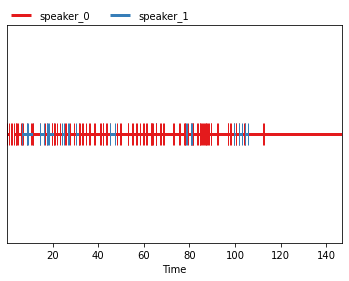

In [2]:
speaker_diarization_run = speaker_diarization_func.run(
    handler = "diarize",
    params={
        "speaker_embeddings__model_path": "./model/titanet_finetune_tr.nemo",
        "VADConfig__model_path": "./model/vad_multilingual_marblenet.nemo",
        "input_path": "./data",
        "output_directory": "./output/tr",
        "num_speakers": 2,
        "device": "cpu",
        "condition_show_plot": True,
    },
    local=True,
    returns=["output_directory: path", "dataset: dataset", "errored_files"],
    artifact_path=artifact_path,
)


In [3]:
speaker_diarization_run.outputs

{'real_state': 'store://artifacts/default/speaker-diarization-diarize_real_state:997588b177424896bc6f7d0ed0c78021',
 'tr': 'store://artifacts/default/speaker-diarization-diarize_tr:997588b177424896bc6f7d0ed0c78021',
 'output_directory': 'store://artifacts/default/speaker-diarization-diarize_output_directory:997588b177424896bc6f7d0ed0c78021',
 'dataset': 'store://artifacts/default/speaker-diarization-diarize_dataset:997588b177424896bc6f7d0ed0c78021',
 'errored_files': 'store://artifacts/default/speaker-diarization-diarize_errored_files:997588b177424896bc6f7d0ed0c78021'}

In [4]:
artifact_path += f"/{speaker_diarization_run.metadata.name}/{speaker_diarization_run.metadata.iteration}/"

In [5]:
df = mlrun.get_dataitem(artifact_path + "dataset.parquet").as_df()

In [6]:
df

,audio_file,diarization_results,converted_audio_file,speaker_segments
0,/User/functions/speaker_diarization/data/real_...,output/tr/real_state,/tmp/converted_audio_aoq9878j.wav,real_state
1,/User/functions/speaker_diarization/data/tr/tr...,output/tr/tr,/tmp/converted_audio_je7qgchb.wav,tr


In [9]:
segments_df = mlrun.get_dataitem(artifact_path+"tr.csv").as_df()

In [10]:
segments_df

,start,end,speaker
0,1.660,2.170,speaker_0
1,4.060,4.410,speaker_0
2,4.620,6.490,speaker_0
3,6.700,8.890,speaker_1
4,9.100,11.225,speaker_1
5,11.225,14.475,speaker_0
6,14.475,16.330,speaker_1
7,16.700,17.325,speaker_0
8,17.325,18.010,speaker_1
9,18.300,20.425,speaker_1
